In [1]:
"""

Exercise 2.3 (10 points)
Write a Python function that takes two images, a source image and a target image (both grayscale)
and then matches the source image's histogram to the target images' histogram.

"""
from skimage import io
from skimage import color
import matplotlib.pyplot as plt
import numpy as np

from skimage import exposure

img_path_source = "https://raw.githubusercontent.com/rkwitt/teaching/master/WS1718/IP/PS/Ex2/lena.jpg"
img_source = io.imread(img_path_source)
img_path_target = "https://raw.githubusercontent.com/rkwitt/teaching/master/WS1718/IP/PS/Ex2/stairs.jpg"
img_target = io.imread(img_path_target)

In [2]:
def histogram_match(source, target):    
    # Calculate the cumulative distribution functions
    cdfSource, bins = exposure.cumulative_distribution(source)
    cdfTarget, bins = exposure.cumulative_distribution(target)

    # Get the matching function (in case of no exact match, find the closest match)
    max = np.size(cdfSource);
    M = np.zeros(max)
    for idx in range(max) :
        M[idx] = np.argmin( abs( cdfSource[idx] - cdfTarget ) );

    # Apply the matching function
    matched = M[source]
    
    return matched

In [3]:
matched = histogram_match ( img_source, img_target )

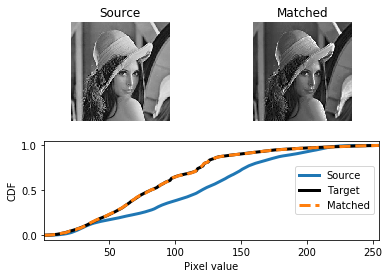

In [4]:
cdfSource, bins = exposure.cumulative_distribution(img_source)
cdfTarget, bins = exposure.cumulative_distribution(img_target)
cdfMatched, bins = exposure.cumulative_distribution(matched)

fig = plt.figure()
gs = plt.GridSpec(2, 2)

fig1 = fig.add_subplot(gs[0, 0])
fig1.set_axis_off()
fig2 = fig.add_subplot(gs[0, 1])
fig2.set_axis_off()
fig3 = fig.add_subplot(gs[1:, :])
fig1.imshow(img_source, cmap=plt.cm.gray)
fig1.set_title('Source')
fig2.imshow(matched, cmap=plt.cm.gray)
fig2.set_title('Matched')

fig3.plot(bins, cdfSource, lw=3, label='Source')
fig3.plot(bins, cdfTarget, 'k', lw=3, label='Target')
fig3.plot(bins, cdfMatched, '--', lw=3, label='Matched')
fig3.set_xlim(bins[0], bins[-1])
fig3.set_xlabel('Pixel value')
fig3.set_ylabel('CDF')
fig3.legend(loc=5)

plt.show()

In [5]:
"""

Exercise 3.1 (5 points)

"""
from skimage import data
from skimage.morphology import disk  # circular neighbourhood
from skimage.filters.rank import median
#import matplotlib.pyplot as plt - already importet from 2.3
#import numpy as np - already importet from 2.3

img = data.camera() # cameraman image

In [6]:
#computing filtered images with the circle neigbourhood of size (3,6....27,30)
med = []
for i in range (1,10):
    med.append( median( img, disk(3*i) ) )

In [7]:
"""
"The PSNR block computes the peak signal-to-noise ratio, in decibels, between two images. 
This ratio is often used as a quality measurement between the original and a compressed image. 
The higher the PSNR, the better the quality of the compressed, or reconstructed image."
(https://de.mathworks.com/help/vision/ref/psnr.html)
"""
def psnr(img1, img2):
    m = np.size( img1, 0 )
    n = np.size( img1, 1 )

    MSE = 0 # mean squared error - difference between img1 and img2
    for i in range ( m-1 ) :
        for j in range ( n-1 ) :
            mse1 = img1[i,j]
            mse2 = img2[i,j]
            MSE = MSE + mse1**2 - 2*mse1*mse2 + mse2**2
    MSE /= m*n

    max_value = np.iinfo(img1.dtype).max
    img_psnr = 20 * np.log10(max_value) - 10 * np.log10 (MSE)
    return img_psnr

In [8]:
# Compute PSNR for each image
PSNRs = []
for i in range (9) :
    PSNRs.append( psnr( img, med[i] ) )

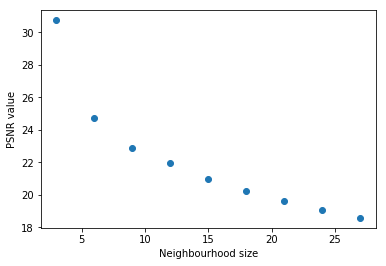

In [9]:
# Plot the PSNR vs. increasing neighborhood sizes
x = range ( 3, 30,  3)
plt.scatter( x, PSNRs )
plt.xlabel('Neighbourhood size')
plt.ylabel('PSNR value')
plt.show()

In [ ]:
"""
INTERPRETATION of the results

- As demonstrated by the plot, the value of PSNR decreases as the neighbourhood size increases.
- The higher PSNR means better quality image. 
  By increasing the neighbourhood size, we're decreasing the quality of the image.
  As the image gets more blurred the mean squared error (MSE, the difference between the original and filtered image)
  gets larger, which decreases the final PSNR value.

"""

In [11]:
"""

Exercise 3.2 (5 points)

"""
#import skimage - already importet from previous excercises
#from skimage import data - already importet from previous excercises
from skimage.filters import gaussian
#import matplotlib.pyplot as plt - already importet from previous excercises
#import numpy as np - already importet from previous excercises

#img = data.camera() # cameraman image - already importet from previous excercises

In [13]:
#computing filtered images with the circle neigbourhood of size (3, 6, ..., 30)
gaus = []
for i in range ( 1, 10 ) :
    gaus.append( gaussian( img, sigma = 3*i ) )

In [14]:
# Compute PSNR for each image - uses the same function as exercise 3.1
max_value = np.iinfo(img.dtype).max
PSNRs = []
for i in range (9) :
    PSNRs.append( psnr( img, gaus[i]*max_value ) ) # multiplied by max size so the images can be compared

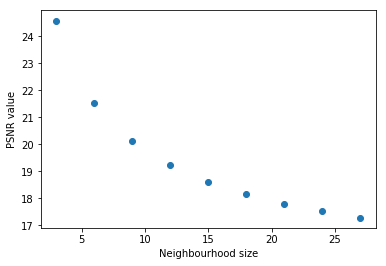

In [15]:
# Plot the PSNR vs. increasing sigma
x = range ( 3, 30, 3 )
plt.scatter( x, PSNRs )
plt.xlabel('Neighbourhood size')
plt.ylabel('PSNR value')
plt.show()

In [ ]:
"""
INTERPRETATION of the results

- Just as in the previous plot, the value of PSNR decreases with increasing sigma.
- Higher sigma creates more blurred image, increasing the value of mean squared error (MSE) and decreasing the 
  final PSNR value.
- The gaussian filter however creates an image with values from 0 to 1, therefore we had to multiply it with
  the maximum possible value (255 in our case) so we could compare the images.
  
"""